# EDA - MIDI files and artists representation

In [5]:
import os
import pretty_midi

def load_midi_files_by_artist(base_dir):
    artist_midi = {}
    for artist in os.listdir(base_dir):
        artist_path = os.path.join(base_dir, artist)
        if os.path.isdir(artist_path):
            midi_files = [f for f in os.listdir(artist_path) if f.endswith('.mid') or f.endswith('.midi')]
            midi_data_list = []
            for midi_file in midi_files:
                file_path = os.path.join(artist_path, midi_file)
                try:
                    midi_data = pretty_midi.PrettyMIDI(file_path)
                    midi_data_list.append(midi_data)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
            artist_midi[artist] = midi_data_list
    return artist_midi

# Example usage:
base_midi_dir = './dataset/NN_midi_files_extended/'  # Update with your MIDI folder path


In [7]:
train_dir = os.path.join(base_midi_dir, 'train')
test_dir = os.path.join(base_midi_dir, 'test')
dev_dir = os.path.join(base_midi_dir, 'dev')


artist_midi_train_dict = load_midi_files_by_artist(train_dir)
artist_midi_test_dict = load_midi_files_by_artist(test_dir)
artist_midi_dev_dict = load_midi_files_by_artist(dev_dir)

artist_midi_dict = {**artist_midi_train_dict, **artist_midi_test_dict, **artist_midi_dev_dict}
artist_classes = list(artist_midi_dict.keys())
# Now artist_midi_dict maps each artist to a list of their MIDI data


/opt/homebrew/anaconda3/envs/masters/lib/python3.12/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


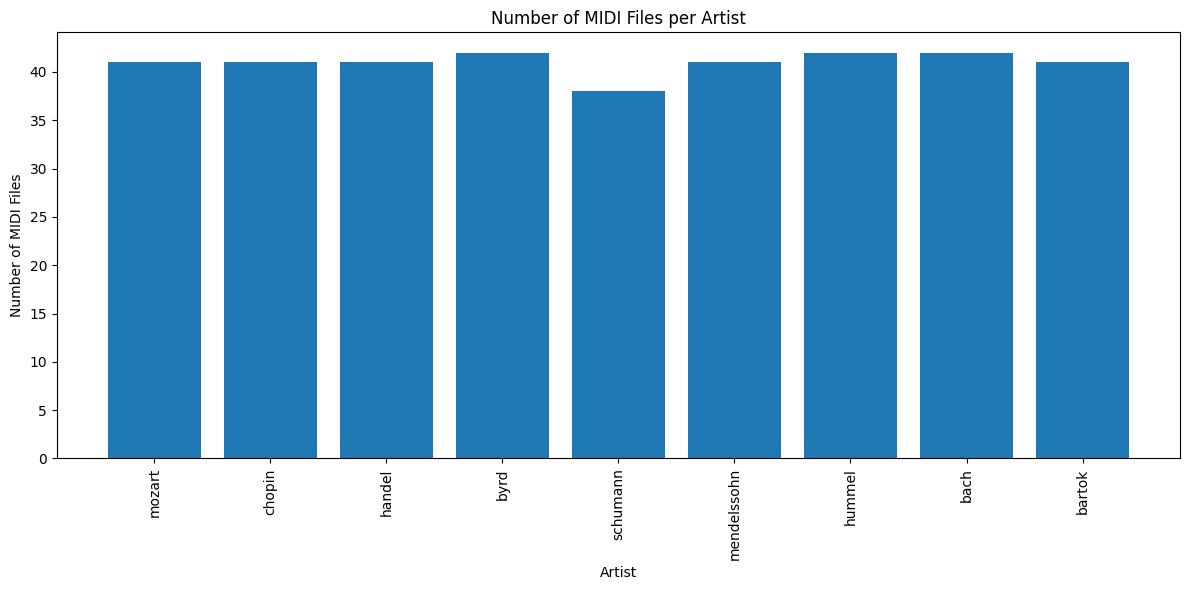

In [6]:
import matplotlib.pyplot as plt

# Count number of MIDI files per artist
artist_counts = {artist: len(midi_list) for artist, midi_list in artist_midi_dict.items()}

# Bar chart of MIDI files per artist
plt.figure(figsize=(12, 6))
plt.bar(artist_counts.keys(), artist_counts.values())
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of MIDI Files')
plt.title('Number of MIDI Files per Artist')
plt.tight_layout()
plt.show()

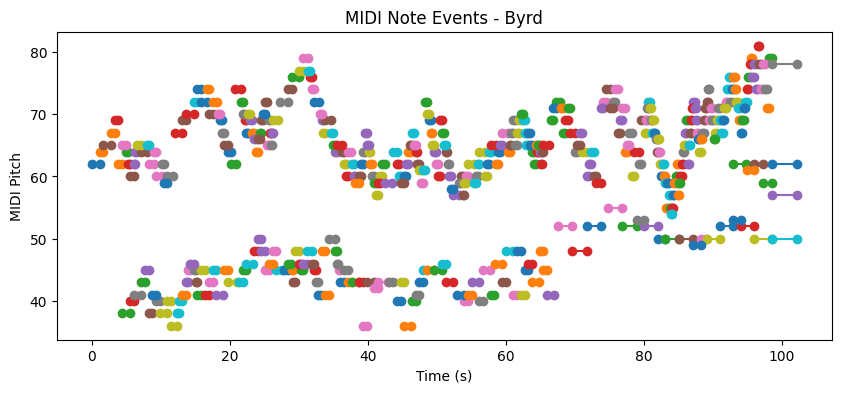

In [9]:
 # Update with your MIDI file path
midi_data = artist_midi_dict['byrd'][0]  

# Visualize the MIDI data
def visualize_midi(midi_data):
    plt.figure(figsize=(10, 4))
    plt.title('MIDI Note Events - Byrd')
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            plt.plot([note.start, note.end], [note.pitch, note.pitch], marker='o')
    plt.xlabel('Time (s)')
    plt.ylabel('MIDI Pitch')
    plt.show()

# Call the visualization function
visualize_midi(midi_data)